### Step 1 - Pra pengolahan Data

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisasi data
x_train = x_train / 255.0
x_test = x_test / 255.0

11490434/11490434 [==============================] - 7s 1us/step


### Step 2 - Pemilihan Fitur

In [2]:
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

### Step 3 - Arsitektur ANN
Activation function 'relu' for hidden layer and 'softmax' for output layer. 'Relu' is a commonly used function for hidden layers, and 'softmax' is used in multiclass classification problems.

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28 * 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

### Step 4 - Pelatihan Model

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2451 - accuracy: 0.9285 - val_loss: 0.1218 - val_accuracy: 0.9637
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1038 - accuracy: 0.9681 - val_loss: 0.1031 - val_accuracy: 0.9685
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0720 - accuracy: 0.9779 - val_loss: 0.1017 - val_accuracy: 0.9694
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0573 - accuracy: 0.9817 - val_loss: 0.0768 - val_accuracy: 0.9763
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0433 - accuracy: 0.9861 - val_loss: 0.0863 - val_accuracy: 0.9722
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0352 - accuracy: 0.9884 - val_loss: 0.0847 - val_accuracy: 0.9754
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0289 - accuracy: 0.9908 - val_loss: 0.0836 - val_accuracy

### Step 5 - Evaluasi Model dan Tes Akurasi

In [5]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 2s 5ms/step - loss: 0.0981 - accuracy: 0.9764
Test accuracy: 0.9764000177383423


### Step 6 - Confusion Matrix

313/313 [==============================] - 1s 4ms/step


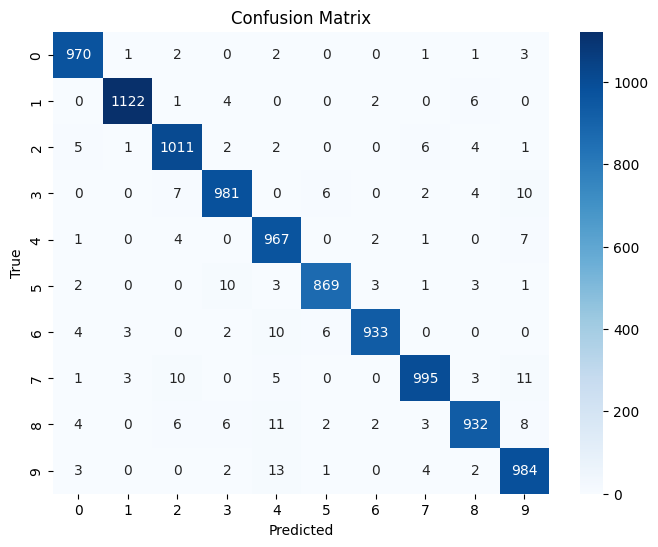

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict labels with your model
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as an image
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()